## Lab Introduction
Growing up, everyone has a hero. For many people, that hero was Muhammad Ali. He taught people it was okay to be proud of who they were, at a time when others would not accept that. He showed people how to stand up for their beliefs in the face of oppression and tyranny. He made people value themselves, and encouraged them care for those around them. He showed us what bravery truly meant, how to be a heck of a boxer, and so much more. Every single person who met Muhammad Ali, either in the ring or outside of it, had a motivating story to share about their encounter.

On June 3, 2016, Muhammad Ali passed away at the age of 74 due to septic shock. Thirty years earlier, he was diagnosed with Parkinson's syndrome, a neurodegenerative condition that doctors attributed to his boxing-related brain injuries.

Parkinson's disease itself is a long-term disorder of the nervous system that affects many aspects of a person's mobility over time. It's characterized by shaking, slowed movement, rigidity, dementia, and depression. In 2013, some 53 million people were diagnosed with it, mostly men. Other famous personalities affected by it include actor Michael J. Fox, and olympic cyclist Davis Phinney.

In this lab, you will be applying SVC to the [Parkinson's Data Set](https://archive.ics.uci.edu/ml/datasets/Parkinsons), provided courtesy of UCI's Machine Learning Repository. The dataset was created at the University of Oxford, in collaboration with 10 medical centers around the US, along with Intel who developed the device used to record the primary features of the dataset: speech signals. Your goals for this lab are first to see if it's possible to differentiate between people who have Parkinson's and who don't using SciKit-Learn's support vector classifier, and then to take a first-stab at a naive way of fine-tuning your parameters in an attempt to maximize the accuracy of your testing set.

"I've never really resented hard work because I've always liked it. Up every morning for roadwork. Going to the gymnasium every day at 12 o'clock. I never change my pattern."

## Cycle 1

Download the dataset from the link above, then load up the **parkinsons.data** into a variable **X**, being sure to drop the name column.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
X = pd.read_csv('parkinsons.data')
X.drop('name', axis =1 ,inplace=True)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Splice out the status column into a variable **y** and delete it from **X**.

In [5]:
y = X.status
X.drop('status', axis = 1, inplace=True)

In [7]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

<AxesSubplot:>

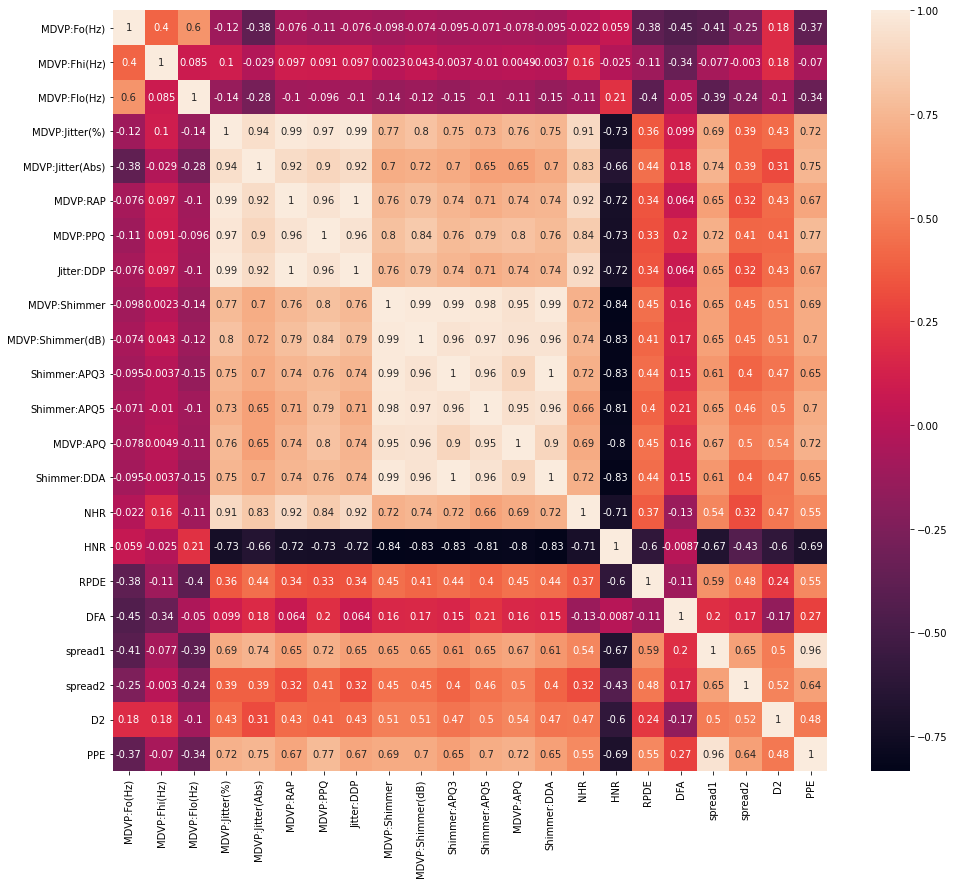

In [13]:
plt.figure(figsize = (16, 14))
sns.heatmap(X.corr(), annot = True)

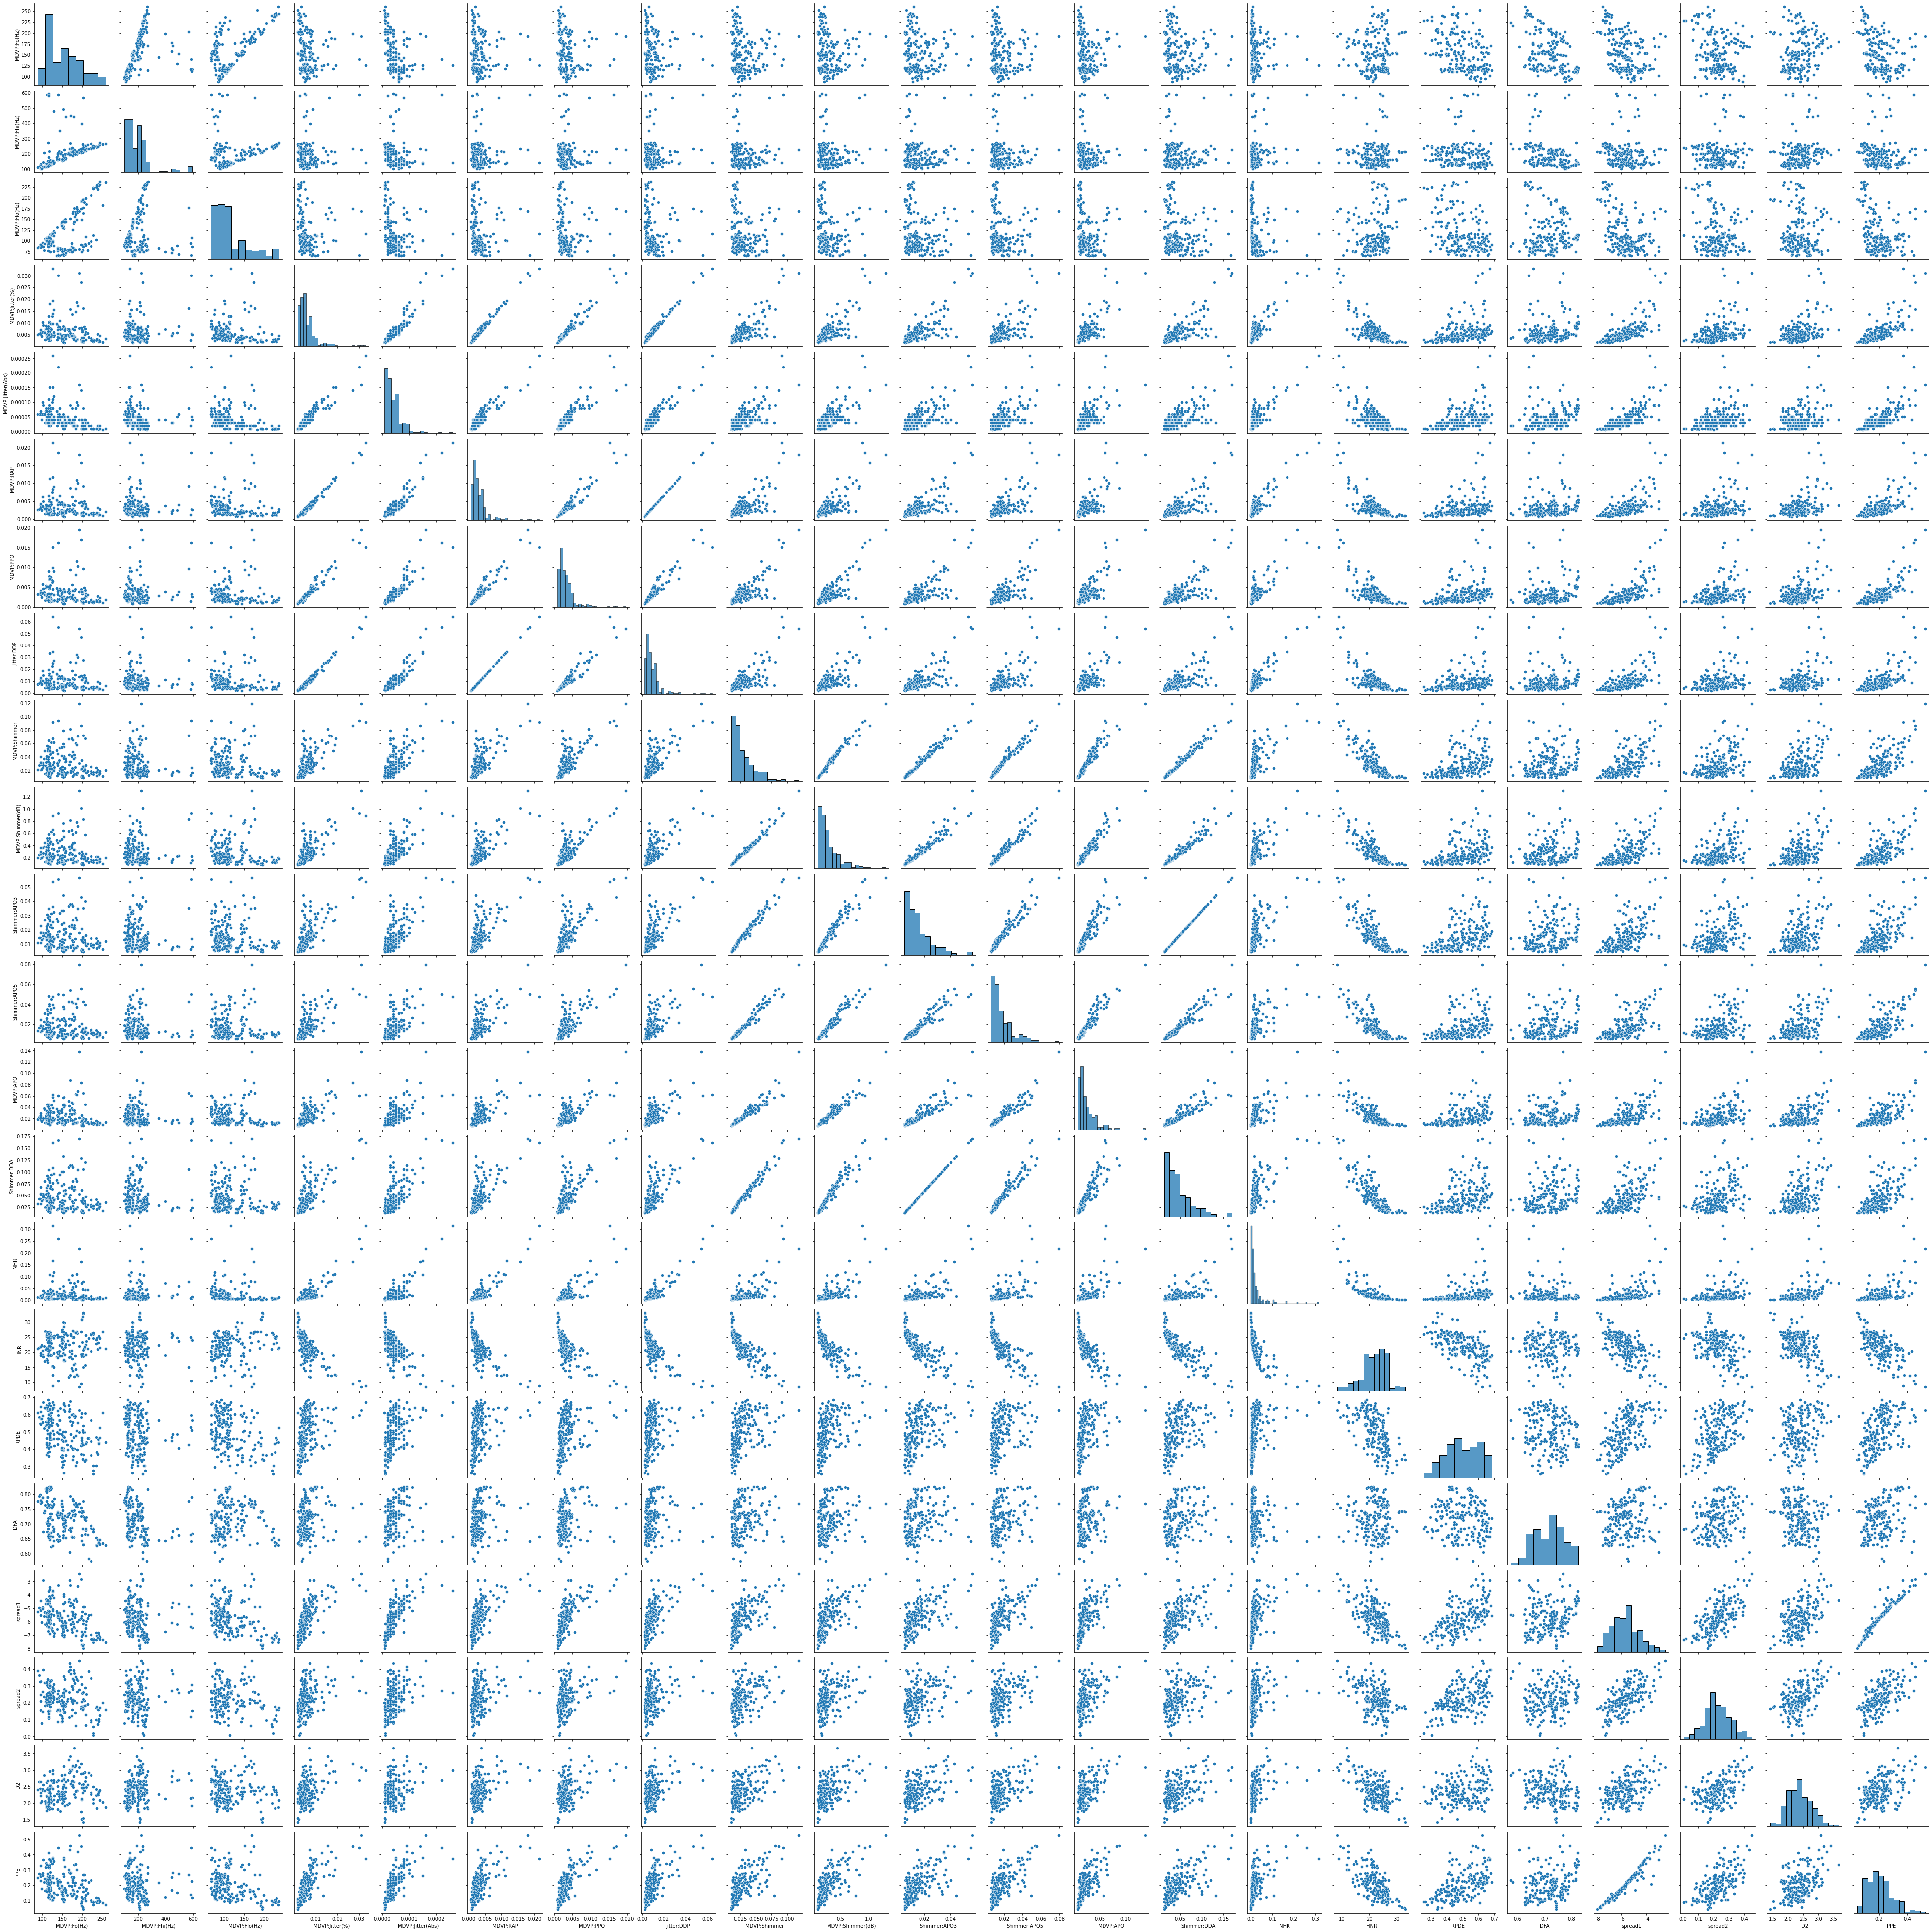

In [8]:
#sns.pairplot(data = X)

Perform a train/test split. **30**% test group size, with a random_state equal to **7**.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 7)

Create a SVC classifier. Don't specify any parameters, just leave everything as default. Fit it against your training data and then score your testing data with accuracy and F1 score.

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.33      0.17      0.22        12
           1       0.81      0.91      0.86        47

    accuracy                           0.76        59
   macro avg       0.57      0.54      0.54        59
weighted avg       0.71      0.76      0.73        59



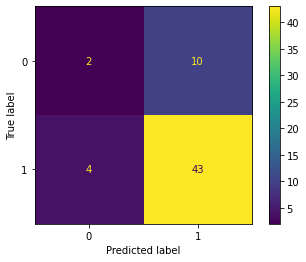

In [17]:
model = SVC()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(classification_report(ytest, ypred))
plot_confusion_matrix(model, xtest, ytest)

## Cycle 2


That accuracy was just too low to be useful. We need to get it up. One way you could go about doing that would be to manually try a bunch of combinations of **C, and gamma values for your rbf kernel**. But that could literally take forever. Also, you might unknowingly skip a pair of values that would have resulted in a very good accuracy.

Instead, lets get the computer to do what computers do best. Program a naive, best-parameter search by creating nested for-loops. The outer for-loop should iterate a variable **C from 0.05 to 2, using 0.05 unit increments**. The inner for-loop should increment a variable **gamma from 0.001 to 0.1, using 0.001 unit increments**. As you know, Python ranges won't allow for float intervals, so you'll have to do some research on NumPy ARanges, if you don't already know how to use them.

Since the goal is to find the parameters that result in the model having the best accuracy score, you'll need a **best_score = 0 variable that you initialize outside of the for-loops.** Inside the inner for-loop, create an SVC model and pass in the C and gamma parameters its class constructor. Train and score the model appropriately. If the current best_score is less than the model's score, update the best_score being sure to print it out, along with the C and gamma values that resulted in it.

After running your lab again, what are the highest accuracy and F1 score you are able to get?

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {'gamma': np.arange(0.001, 0.1001, 0.001),
             'C': np.arange(0.05, 2.01, 0.05)}
estimator = SVC()
grid_model = GridSearchCV(estimator= estimator,
                         param_grid=param_grid,
                         n_jobs=-1)

In [20]:
%%time
grid_model.fit(xtrain, ytrain)

Wall time: 17.2 s


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
                         'gamma': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.01...
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0

In [21]:
grid_model.best_params_

{'C': 0.9500000000000001, 'gamma': 0.003}

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.87      1.00      0.93        47

    accuracy                           0.88        59
   macro avg       0.94      0.71      0.76        59
weighted avg       0.90      0.88      0.86        59



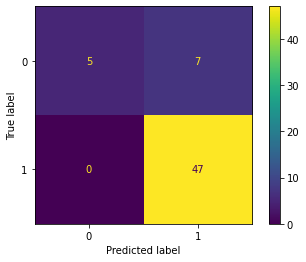

In [22]:
ypred = grid_model.predict(xtest)
print(classification_report(ytest, ypred))
plot_confusion_matrix(grid_model, xtest, ytest)

## Cycle 3

Wait a second. Pull open the dataset's label file from: https://archive.ics.uci.edu/ml/datasets/Parkinsons

Look at the units on those columns: **Hz, %, Abs, dB, etc.** What happened to transforming your data? With all of those units interacting with one another, some pre-processing is surely in order.
Right after you preform the train/test split but before you train your model, inject SciKit-Learn's pre-processing code. Unless you have a good idea which one is going to work best, you're going to have to try the various pre-processors one at a time, checking to see if they improve your predictive accuracy.

Experiment with ***Normalizer(), MaxAbsScaler(), MinMaxScaler(), KernelCenterer(), and StandardScaler().***

After trying all of these scalers, what are the new highest accuracy and F1 score you're able to achieve?

In [24]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import Normalizer, MaxAbsScaler, MinMaxScaler, KernelCenterer, StandardScaler

In [41]:
scaler = StandardScaler()
svc = SVC()

In [42]:
operation = [('scaler', scaler), ('svc', SVC)]

In [43]:
pipe = Pipeline(operation)

In [44]:
param_grid = {'svc__gamma': np.arange(0.001, 0.0101, 0.001),
             'svc__C': np.arange(0.05, 2.01, 0.05)}

In [47]:
grid = GridSearchCV(pipe,
                   param_grid=param_grid,
                   n_jobs=-1,
                   cv= 5)

In [48]:
grid.fit(xtrain, ytrain)

TypeError: get_params() missing 1 required positional argument: 'self'

In [49]:
pipeline = make_pipeline(scaler, svc)

In [50]:
pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

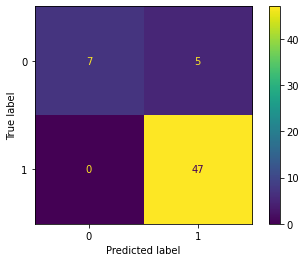

In [51]:
plot_confusion_matrix(pipeline, xtest, ytest)

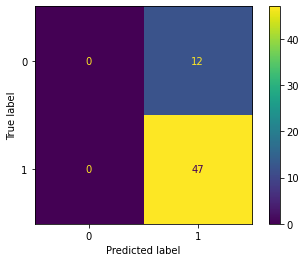

In [52]:
plot_confusion_matrix(svc, xtest, ytest)

In [64]:
scaler = [Normalizer(), MaxAbsScaler(), MinMaxScaler(), 
          StandardScaler()]

In [59]:
model = SVC(C=0.95, gamma= 0.003)

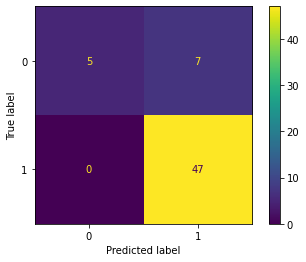

In [62]:

model.fit(xtrain, ytrain)
plot_confusion_matrix(model, xtest, ytest)

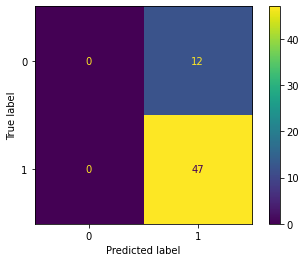

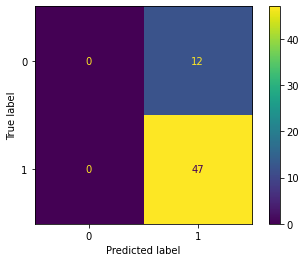

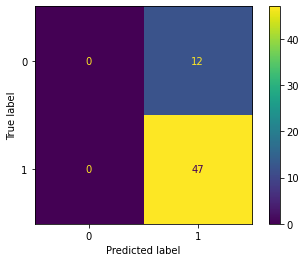

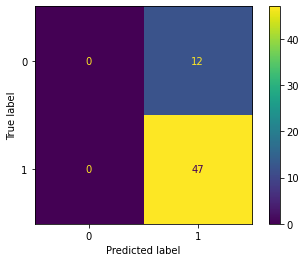

In [63]:
for i in scaler:
    pipe = make_pipeline(i, model)
    pipe.fit(xtrain, ytrain)
    x_test = i.fit_transform(xtest)
    plot_confusion_matrix(pipe, x_test, ytest)

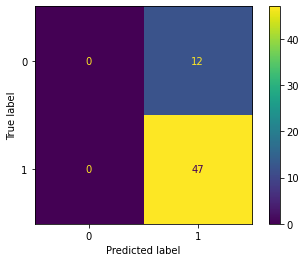

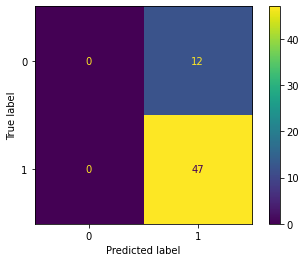

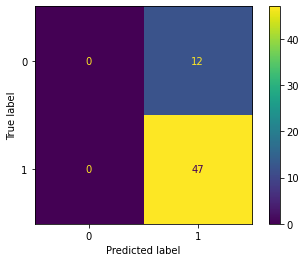

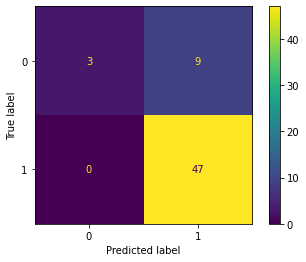

In [65]:
for i in scaler:
    i.fit(xtrain)
    x_train = i.transform(xtrain)
    x_test = i.transform(xtest)
    model.fit(x_train, ytrain)
    plot_confusion_matrix(model, x_test, ytest)

In [67]:
scaler = StandardScaler()
scaler.fit(xtrain)
x_train = scaler.transform(xtrain)
x_test = scaler.transform(xtest)


In [71]:
%%time
param_grid = {'gamma': np.arange(0.001, 0.1001, 0.001),
             'C': np.arange(0.05, 2.01, 0.05),
             'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [2,3,4]}
estimator = SVC()
grid_model = GridSearchCV(estimator= estimator,
                         param_grid=param_grid,
                         n_jobs=-1)
grid_model.fit(x_train, ytrain)

Wall time: 1min 15s


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
                         'degree': [2, 3, 4],
                         'gamma': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013...
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ]),
                         'kernel': [

In [72]:
grid_model.best_params_


{'C': 0.7500000000000001, 'degree': 3, 'gamma': 0.098, 'kernel': 'poly'}

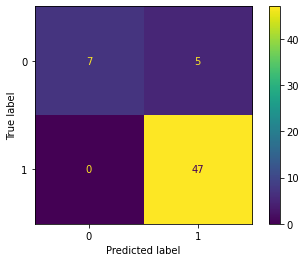

In [73]:
plot_confusion_matrix(grid_model, x_test, ytest)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
model = KNeighborsClassifier()

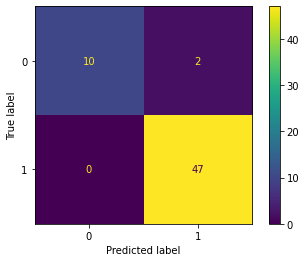

In [76]:
model.fit(x_train, ytrain)
plot_confusion_matrix(model, x_test, ytest)

In [80]:
scaler = StandardScaler()


param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,11,1),
             'kneighborsclassifier__weights' : ['uniform', 'distance']}
pipe = make_pipeline(scaler, KNeighborsClassifier())
grid_model = GridSearchCV(estimator=pipe,
                         param_grid=param_grid,
                         n_jobs=-1)
grid_model.fit(xtrain, ytrain)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [82]:
grid_model.best_params_

{'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__weights': 'distance'}

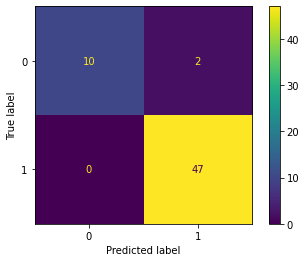

In [83]:
model = KNeighborsClassifier(n_neighbors=5,
                            weights='distance')
model.fit(x_train, ytrain)
plot_confusion_matrix(model, x_test, ytest)

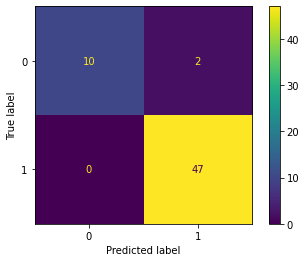

In [81]:
plot_confusion_matrix(grid_model, xtest, ytest)

In [85]:
scaler = StandardScaler()
model = KNeighborsClassifier()

param_grid = {'model__n_neighbors': np.arange(1,11,1),
             'model__weights' : ['uniform', 'distance']}
pipe = Pipeline([('scaler',scaler), ('model', model)])
grid_model = GridSearchCV(estimator=pipe,
                         param_grid=param_grid,
                         n_jobs=-1)
grid_model.fit(xtrain, ytrain)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__weights': ['uniform', 'distance']})

In [86]:
grid_model.best_params_

{'model__n_neighbors': 5, 'model__weights': 'distance'}

In [87]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

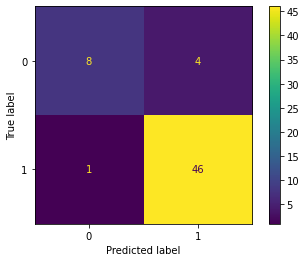

In [88]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
plot_confusion_matrix(model, xtest, ytest)

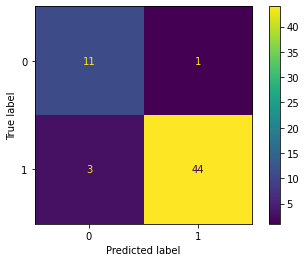

In [89]:
model = AdaBoostClassifier()
model.fit(xtrain, ytrain)
plot_confusion_matrix(model, xtest, ytest)